In [33]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

plt.rcParams['text.usetex'] = True

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

# Example usage of some constants
print(f"Permittivity of free space: {epsilon_0} F/m")
print(f"Permeability of free space: {mu_0} N/A^2")
print(f"Speed of light in vacuum: {c} m/s")
# print(f"Elementary charge: {e} C")
# print(f"Planck constant: {h} J·s")
# print(f"Reduced Planck constant: {hbar} J·s")
print(f"Boltzmann constant: {k} J/K")
# print(f"Newtonian constant of gravitation: {G} m^3/kg/s^2")
# print(f"Electron mass: {m_e} kg")
# print(f"Proton mass: {m_p} kg")
# print(f"Neutron mass: {m_n} kg")
# print(f"Fine-structure constant: {alpha}")
print(f"Electron volt: {eV} J")

def print_engineering_notation(value):
    """
    Print a value in engineering notation (powers of ten in multiples of 3).

    Parameters:
    value (float): The value to be printed in engineering notation.
    """
    
    if value == 0:
        print("0")
        return

    exponent = int(math.floor(math.log10(abs(value)) / 3) * 3)
    mantissa = value / (10 ** exponent)
    
    print(f"{mantissa:.3f}e{exponent}")

# Example usage
print_engineering_notation(0)          # Output: 0
print_engineering_notation(1234.56)    # Output: 1.235e3
print_engineering_notation(0.00123456) # Output: 1.235e-3
print_engineering_notation(-987654)    # Output: -987.654e3
print_engineering_notation(1e9)        # Output: 1.000e9


Permittivity of free space: 8.8541878128e-12 F/m
Permeability of free space: 1.25663706212e-06 N/A^2
Speed of light in vacuum: 299792458.0 m/s
Boltzmann constant: 1.380649e-23 J/K
Electron volt: 1.602176634e-19 J
0
1.235e3
1.235e-3
-987.654e3
1.000e9


In [34]:
sj_rho_salt0_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelsub jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
sj_rho_salt1eN5_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
sj_rho_salt1eN3_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelsub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
sj_rho_salt4p2eN2_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelsub jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')
sj_maxD_rho_salt0_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelsub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
sj_maxD_rho_salt1eN3_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelsub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
sj_maxD_rho_salt4p2eN2_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelsub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

aj_rho_salt0_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
aj_rho_salt1eN5_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
aj_rho_salt1eN3_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
aj_rho_salt4p2eN2_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')
aj_maxD_rho_salt0_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
aj_maxD_rho_salt1eN3_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
aj_maxD_rho_salt4p2eN2_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

ao_rho_salt0_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti orbital point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
ao_rho_salt1eN5_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
ao_rho_salt1eN3_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
ao_rho_salt4p2eN2_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti orbital point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

ao_maxD_rho_salt0_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti orbital point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
ao_maxD_rho_salt1eN3_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti orbital point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
ao_maxD_rho_salt4p2eN2_df = pd.read_csv('2024-11-13_15-51-39/cryosphere_modelanti orbital point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

In [35]:
from pucks_to_penetrate_cryosphere import calc_path_loss

for df in [sj_rho_salt0_df, sj_rho_salt1eN3_df, sj_rho_salt4p2eN2_df, 
           sj_maxD_rho_salt0_df, sj_maxD_rho_salt1eN3_df, sj_maxD_rho_salt4p2eN2_df,
           aj_rho_salt0_df, aj_rho_salt1eN3_df, aj_rho_salt4p2eN2_df, 
           aj_maxD_rho_salt0_df, aj_maxD_rho_salt1eN3_df, aj_maxD_rho_salt4p2eN2_df,
           ao_rho_salt0_df, ao_rho_salt1eN3_df, ao_rho_salt4p2eN2_df, 
           ao_maxD_rho_salt0_df, ao_maxD_rho_salt1eN3_df, ao_maxD_rho_salt4p2eN2_df,
           ]:
    alpha_low_band = np.zeros(len(df))
    alpha_high_band = np.zeros(len(df))
    for d in np.arange(len(df)):    
        epsilon_s_prime = df.loc[d]['epsilon_s_prime']
        epsilon_s_primeprime = df.loc[d]['epsilon_s_primeprime']
        sigma_s = df.loc[d]['sigma_s']

        alpha_low_band[d] = calc_path_loss(2 * np.pi * 5.373e6, epsilon_s_prime, epsilon_s_primeprime, sigma_s)
        alpha_high_band[d] = calc_path_loss(2 * np.pi * 413e6, epsilon_s_prime, epsilon_s_primeprime, sigma_s)
    df['alpha_s low band'] = alpha_low_band
    df['alpha_s high band'] = alpha_high_band

    df['dB per km low band'] = 8.68589 * alpha_low_band
    df['dB per km high band'] = 8.68589 * alpha_high_band

In [36]:
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

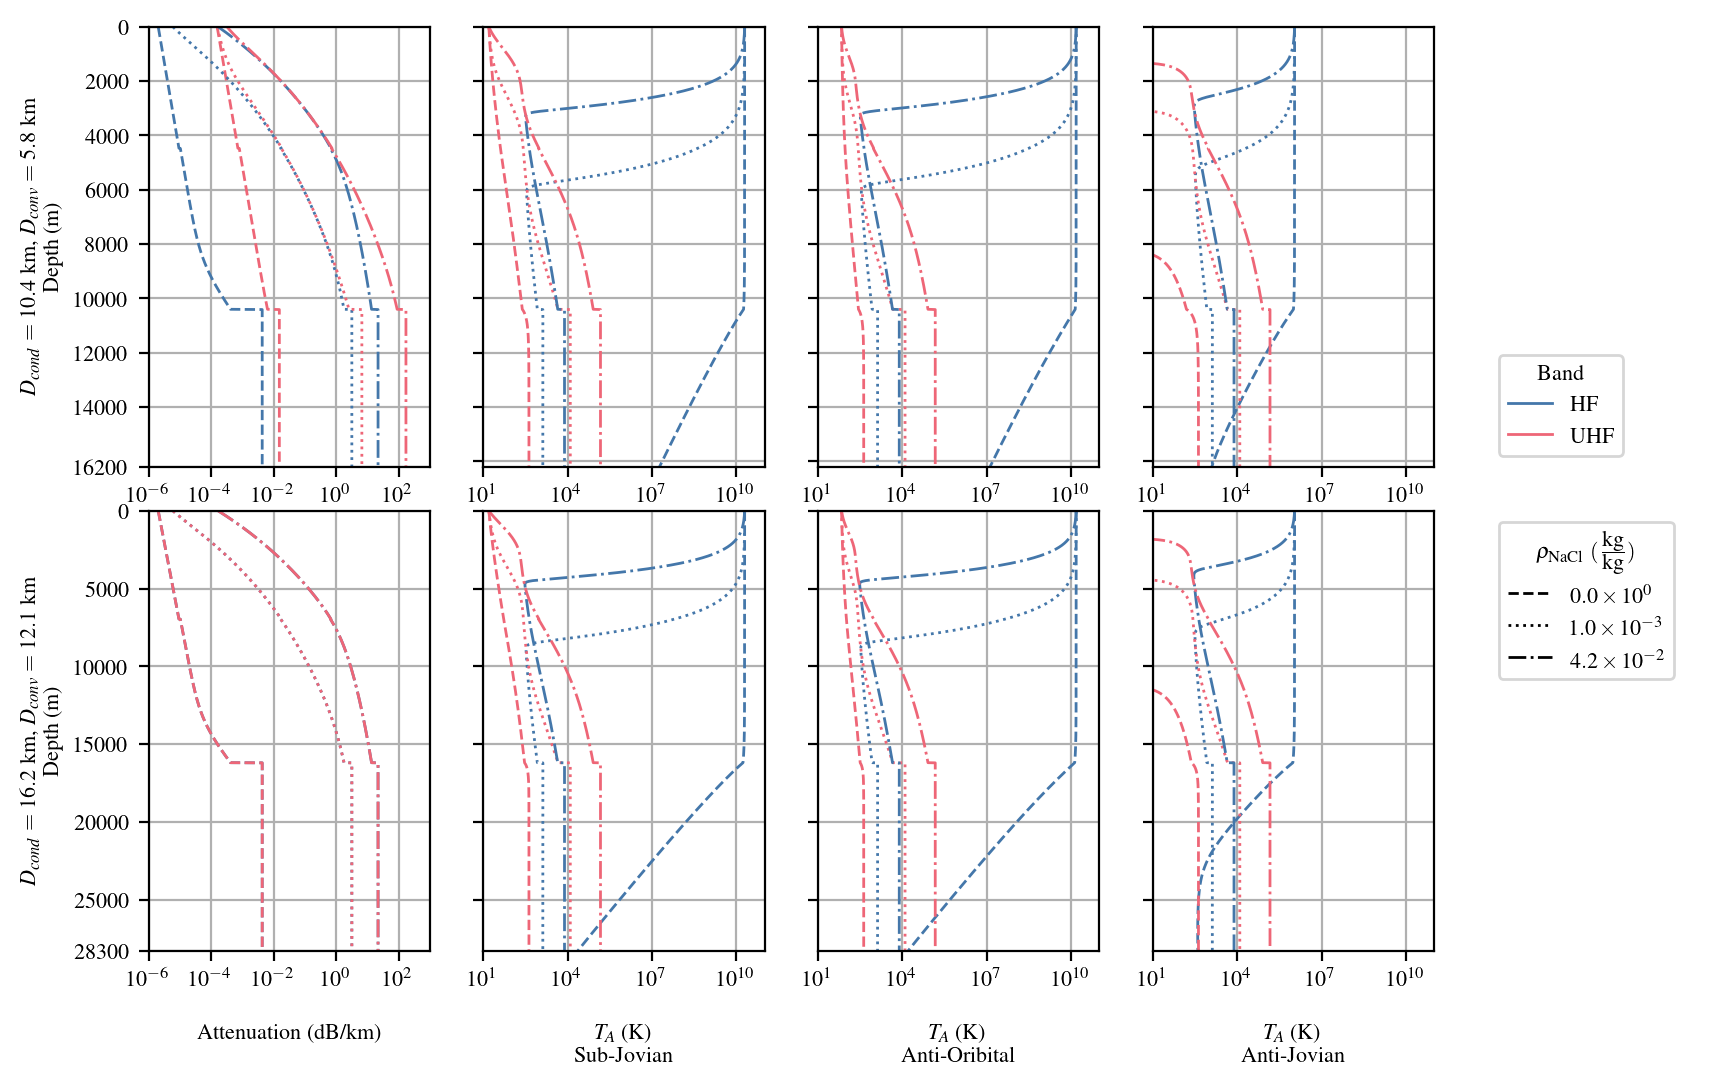

In [37]:
low_band_f = 5.373e6
high_band_f = 413e6

fig = plt.figure(figsize=(10, 6))
num_y_plots = 2
width_ratios = [2, 2, 2, 2, 1.5]
num_x_plots = len(width_ratios)
number_of_plots = num_y_plots * num_x_plots
gs = GridSpec(num_y_plots, num_x_plots, width_ratios=width_ratios, wspace=0.2, hspace=0.1)

positions = [(int(i / num_x_plots), (i % num_x_plots)) for i in range(number_of_plots)]

axs = []
for pos in positions:
    temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
    axs.append(temp_ax)

axs = np.array(axs)
ax = np.reshape(axs, (num_y_plots, num_x_plots))

# Plot attenutaion, and T_A

# Custom legend for colors
color_cycler=['C0', 'C1', 'black', 'C3', 'C4', 'C5']
color_legend = [Line2D([0], [0], color=c, lw=1) for c in color_cycler]
color_labels = ['HF', 'UHF']

# Custom legend for linestyles
linestyle_cycler=['--', ':', '-.']
linestyle_legend = [Line2D([0], [0], color='black', lw=1, linestyle=ls) for ls in linestyle_cycler]
linestyle_labels = [r'$0.0\times10^{0}$',  
                    r'$1.0\times10^{-3}$', 
                    r'$4.2\times10^{-2}$']

low_xlim_T_A = 10**1
hi_xlim_T_A = 10**11

yticks_to_set_on_df = [0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., np.max(np.max(sj_rho_salt0_df['Depth (m)']))]
yticks_to_set_on_maxdf = [0.,  5000., 10000., 15000., 
        20000., 25000., np.max(np.max(sj_maxD_rho_salt0_df['Depth (m)']))]
 
rho_salt_list_of_dfs = [sj_rho_salt0_df, sj_rho_salt1eN3_df, sj_rho_salt4p2eN2_df]
rho_salt_list_of_max_dfs = [sj_maxD_rho_salt0_df, sj_maxD_rho_salt1eN3_df, sj_maxD_rho_salt4p2eN2_df]
for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    max_df = rho_salt_list_of_max_dfs[i]
    
    # Attenuation
    ax[0, 0].plot(df['dB per km low band'], df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 0].plot(df['dB per km high band'], df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xlim(10**-6, 10**3)

    ax[1, 0].plot(max_df['dB per km low band'], max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 0].plot(max_df['dB per km low band'], max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xlabel(r'Attenuation (dB/km)', labelpad=12)
    ax[1, 0].set_xlim(10**-6, 10**3)

    ax[0, 0].set_ylabel(r'$D_{cond}=10.4\textrm{ km}$, $D_{conv}=5.8\textrm{ km}$' '\n' 'Depth (m)')
    ax[1, 0].set_ylabel(r'$D_{cond}=16.2\textrm{ km}$, $D_{conv}=12.1\textrm{ km}$' '\n' 'Depth (m)')
    
    # Fix the yticks
    ax[0, 0].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[0, 0].set_yticks(yticks_to_set_on_df)  
    ax[1, 0].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 0].set_yticks(yticks_to_set_on_maxdf) 


    # Downwelling T A 
    ax[0, 1].plot(df['T_A Downwelling Low Band (K)'] + df['T_A Upwelling Low Band (K)'], 
                  df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 1].plot(df['T_A Downwelling High Band (K)'], 
                  df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    ax[1, 1].plot(max_df['T_A Downwelling Low Band (K)'] + max_df['T_A Upwelling Low Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 1].plot(max_df['T_A Downwelling High Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 1].set_xlabel('$T_A$ (K)\nSub-Jovian', labelpad=12)
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    # Fix the yticks
    ax[0, 1].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 1].set_ylim(0, yticks_to_set_on_maxdf[-1]) 

rho_salt_list_of_dfs = [ao_rho_salt0_df, ao_rho_salt1eN3_df, ao_rho_salt4p2eN2_df]
rho_salt_list_of_max_dfs = [ao_maxD_rho_salt0_df, ao_maxD_rho_salt1eN3_df, ao_maxD_rho_salt4p2eN2_df]
for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    max_df = rho_salt_list_of_max_dfs[i]
    
    # Downwelling T A 
    ax[0, 2].plot(df['T_A Downwelling Low Band (K)'] + df['T_A Upwelling Low Band (K)'], 
                  df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 2].plot(df['T_A Downwelling High Band (K)'], 
                  df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    ax[1, 2].plot(max_df['T_A Downwelling Low Band (K)'] + max_df['T_A Upwelling Low Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 2].plot(max_df['T_A Downwelling High Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 2].set_xlabel('$T_A$ (K)\nAnti-Oribital', labelpad=12)
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    # Fix the yticks
    ax[0, 2].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 2].set_ylim(0, yticks_to_set_on_maxdf[-1]) 

rho_salt_list_of_dfs = [aj_rho_salt0_df, aj_rho_salt1eN3_df, aj_rho_salt4p2eN2_df]
rho_salt_list_of_max_dfs = [aj_maxD_rho_salt0_df, aj_maxD_rho_salt1eN3_df, aj_maxD_rho_salt4p2eN2_df]
for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    max_df = rho_salt_list_of_max_dfs[i]
    
    # Downwelling T A 
    ax[0, 3].plot(df['T_A Downwelling Low Band (K)'] + df['T_A Upwelling Low Band (K)'], 
                  df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 3].plot(df['T_A Downwelling High Band (K)'], 
                  df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 3].set_xscale('log')
    ax[0, 3].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    ax[1, 3].plot(max_df['T_A Downwelling Low Band (K)'] + max_df['T_A Upwelling Low Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 3].plot(max_df['T_A Downwelling High Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 3].set_xlabel('$T_A$ (K)\nAnti-Jovian', labelpad=12)
    ax[1, 3].set_xscale('log')
    ax[1, 3].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    # Fix the yticks
    ax[0, 3].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 3].set_ylim(0, yticks_to_set_on_maxdf[-1]) 

# Create a combined legend with color and linestyle legends
ax[0, num_x_plots-1].legend(color_legend, color_labels, title='Band', loc='lower left')
ax[1, num_x_plots-1].legend(linestyle_legend, linestyle_labels, title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', loc='upper left')

# axs[7].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != num_x_plots:
        axs[i].set_yticklabels([])
    if i==num_x_plots-1 or i==number_of_plots-1:
        axs[i].axis('off')

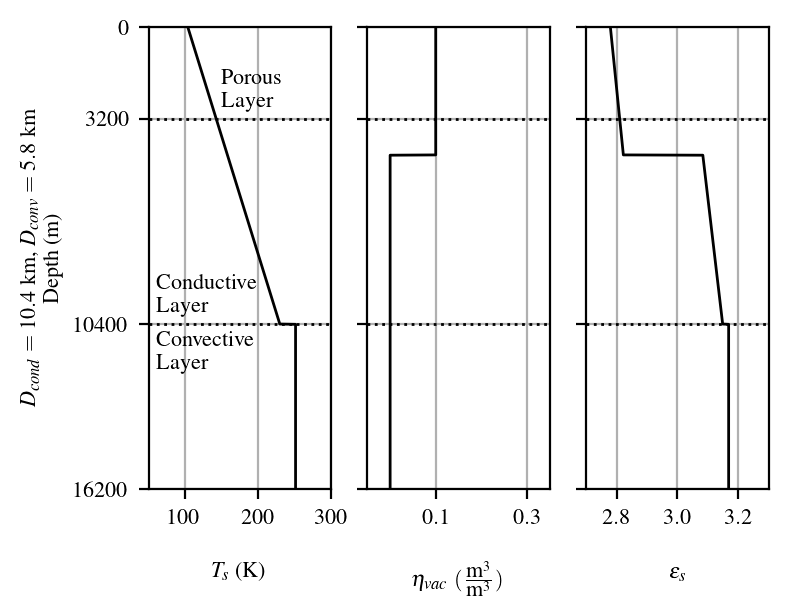

In [38]:
low_band_f = 5.373e6
high_band_f = 413e6

fig = plt.figure(figsize=(4, 3))
num_y_plots = 1
width_ratios = [1, 1, 1]
num_x_plots = len(width_ratios)
number_of_plots = num_y_plots * num_x_plots
gs = GridSpec(num_y_plots, num_x_plots, width_ratios=width_ratios, wspace=0.2, hspace=0.1)

positions = [(int(i / num_x_plots), (i % num_x_plots)) for i in range(number_of_plots)]

axs = []
for pos in positions:
    temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
    axs.append(temp_ax)

axs = np.array(axs)
ax = np.reshape(axs, (num_y_plots, num_x_plots))

df = sj_rho_salt0_df

yticks_to_set_on_df = [0.,  3200.,  10400., np.max(np.max(sj_rho_salt0_df['Depth (m)']))]

brittle_depth = 3.2e3
cond_depth = 10.4e3
# Add horizontal dotted line at specific depth

# Temperature
ax[0, 0].plot(df['Temperature (K)'], df['Depth (m)'], c='black')
ax[0, 0].set_ylabel(r'$D_{cond}=10.4\textrm{ km}$, $D_{conv}=5.8\textrm{ km}$' '\n' 'Depth (m)')
ax[0, 0].set_xlim(50, 300)
ax[0, 0].set_xticks([100, 200, 300])
ax[0, 0].set_xlabel('$T_s$ (K)', labelpad=12)


# Fix the yticks
ax[0, 0].set_ylim(0, yticks_to_set_on_df[-1]) 
ax[0, 0].set_yticks(yticks_to_set_on_df)  

ax[0, 0].axhline(brittle_depth, color='black', linestyle=':', linewidth=1)
ax[0, 0].axhline(cond_depth, color='black', linestyle=':', linewidth=1)

# Porosity
ax[0, 1].plot(df['Porosity (m^3/m^3)'], df['Depth (m)'], c='black')
ax[0, 1].set_xlim(-0.05, 0.35)
ax[0, 1].set_xticks([0.1, 0.3])
ax[0, 1].set_xlabel(r'$\eta_{vac}$ $(\frac{\textrm{m}^3}{\textrm{m}^3})$', labelpad=12)
ax[0, 1].set_ylim(0, yticks_to_set_on_df[-1]) 
ax[0, 1].set_yticks(yticks_to_set_on_df)  

ax[0, 1].axhline(brittle_depth, color='black', linestyle=':', linewidth=1)
ax[0, 1].axhline(cond_depth, color='black', linestyle=':', linewidth=1)

# Permittivity
ax[0, 2].plot(df['epsilon_s_prime'], df['Depth (m)'], c='black')
ax[0, 2].set_xlim([2.7, 3.3])
ax[0, 2].set_xticks([2.8, 3.0, 3.2])
ax[0, 2].set_xlabel(r'$\epsilon_s$', labelpad=12)
ax[0, 2].set_ylim(0, yticks_to_set_on_df[-1]) 
ax[0, 2].set_yticks(yticks_to_set_on_df)  

ax[0, 2].axhline(brittle_depth, color='black', linestyle=':', linewidth=1)
ax[0, 2].axhline(cond_depth, color='black', linestyle=':', linewidth=1)

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != num_x_plots:
        axs[i].set_yticklabels([])
    else:
        if i < num_x_plots:
            brittle_depth = 3.2e3
            cond_depth = 10.4e3
            # Add horizontal dotted line at specific depth
            # Add label for the horizontal line
            if i == 0:
                axs[i].text(axs[i].get_xlim()[1] - 150, brittle_depth - 1e3, 'Porous\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth - 1e3, 'Conductive\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth + 1e3, 'Convective\nLayer', va='center', ha='left', color='black')
        else:
            brittle_depth =  0.43*16.2e3
            cond_depth = 16.2e3
            # Add horizontal dotted line at specific depth
            axs[i].axhline(brittle_depth, color='black', linestyle=':', linewidth=1)
            axs[i].axhline(cond_depth, color='black', linestyle=':', linewidth=1)
            # Add label for the horizontal line
            if i==7:
                axs[i].text(axs[i].get_xlim()[1] - 150, brittle_depth - 4e3, 'Porous\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth - 4e3, 'Conductive\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth + 5.5e3,'Convective\nLayer', va='center', ha='left', color='black')



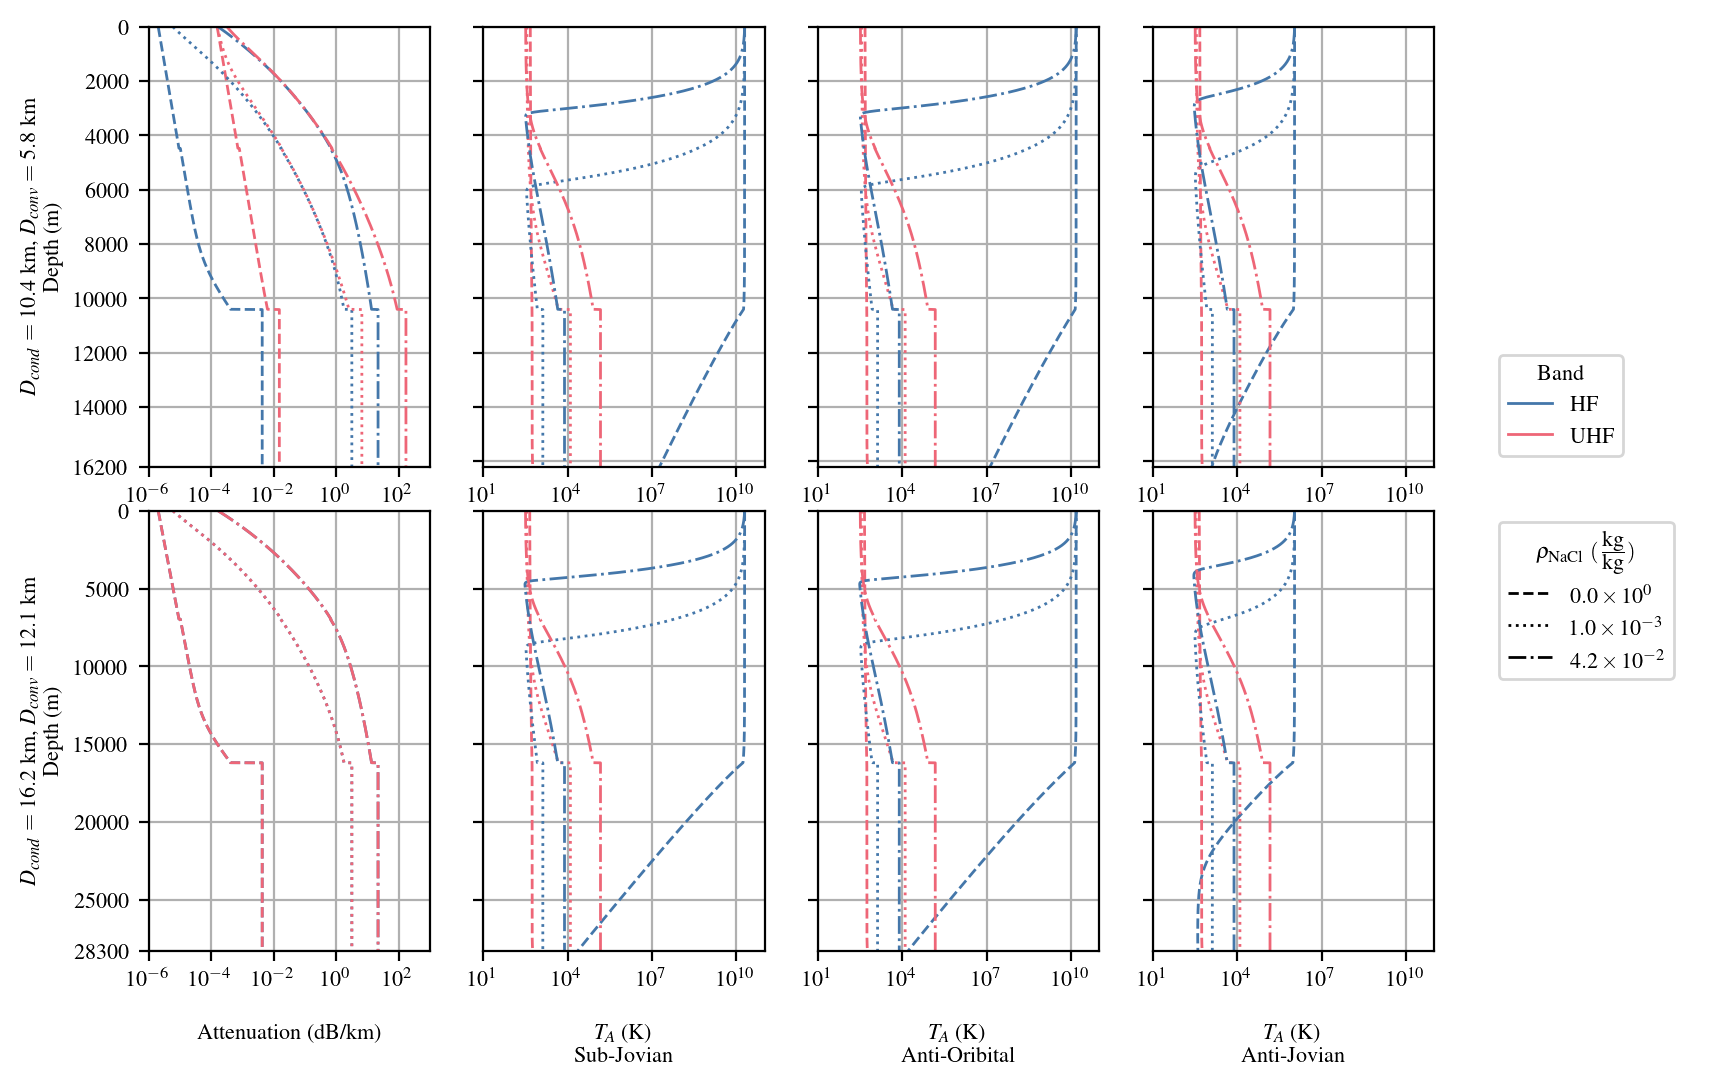

In [39]:
low_band_f = 5.373e6
high_band_f = 413e6

fig = plt.figure(figsize=(10, 6))
num_y_plots = 2
width_ratios = [2, 2, 2, 2, 1.5]
num_x_plots = len(width_ratios)
number_of_plots = num_y_plots * num_x_plots
gs = GridSpec(num_y_plots, num_x_plots, width_ratios=width_ratios, wspace=0.2, hspace=0.1)

positions = [(int(i / num_x_plots), (i % num_x_plots)) for i in range(number_of_plots)]

axs = []
for pos in positions:
    temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
    axs.append(temp_ax)

axs = np.array(axs)
ax = np.reshape(axs, (num_y_plots, num_x_plots))

# Plot attenutaion, and T_A

# Custom legend for colors
color_cycler=['C0', 'C1', 'black', 'C3', 'C4', 'C5']
color_legend = [Line2D([0], [0], color=c, lw=1) for c in color_cycler]
color_labels = ['HF', 'UHF']

# Custom legend for linestyles
linestyle_cycler=['--', ':', '-.']
linestyle_legend = [Line2D([0], [0], color='black', lw=1, linestyle=ls) for ls in linestyle_cycler]
linestyle_labels = [r'$0.0\times10^{0}$',  
                    r'$1.0\times10^{-3}$', 
                    r'$4.2\times10^{-2}$']

low_xlim_T_A = 10**1
hi_xlim_T_A = 10**11

yticks_to_set_on_df = [0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., np.max(np.max(sj_rho_salt0_df['Depth (m)']))]
yticks_to_set_on_maxdf = [0.,  5000., 10000., 15000., 
        20000., 25000., np.max(np.max(sj_maxD_rho_salt0_df['Depth (m)']))]
 
rho_salt_list_of_dfs = [sj_rho_salt0_df, sj_rho_salt1eN3_df, sj_rho_salt4p2eN2_df]
rho_salt_list_of_max_dfs = [sj_maxD_rho_salt0_df, sj_maxD_rho_salt1eN3_df, sj_maxD_rho_salt4p2eN2_df]
for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    max_df = rho_salt_list_of_max_dfs[i]
    
    # Attenuation
    ax[0, 0].plot(df['dB per km low band'], df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 0].plot(df['dB per km high band'], df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 0].set_xscale('log')
    ax[0, 0].set_xlim(10**-6, 10**3)

    ax[1, 0].plot(max_df['dB per km low band'], max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 0].plot(max_df['dB per km low band'], max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 0].set_xscale('log')
    ax[1, 0].set_xlabel(r'Attenuation (dB/km)', labelpad=12)
    ax[1, 0].set_xlim(10**-6, 10**3)

    ax[0, 0].set_ylabel(r'$D_{cond}=10.4\textrm{ km}$, $D_{conv}=5.8\textrm{ km}$' '\n' 'Depth (m)')
    ax[1, 0].set_ylabel(r'$D_{cond}=16.2\textrm{ km}$, $D_{conv}=12.1\textrm{ km}$' '\n' 'Depth (m)')
    
    # Fix the yticks
    ax[0, 0].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[0, 0].set_yticks(yticks_to_set_on_df)  
    ax[1, 0].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 0].set_yticks(yticks_to_set_on_maxdf) 


    #  T A 
    ax[0, 1].plot(df['T_A Downwelling Low Band (K)'] + df['T_A Upwelling Low Band (K)'], 
                  df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 1].plot(df['T_A Upwelling High Band (K)'], 
                  df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    ax[1, 1].plot(max_df['T_A Downwelling Low Band (K)'] + max_df['T_A Upwelling Low Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 1].plot(max_df['T_A Upwelling High Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 1].set_xlabel('$T_A$ (K)\nSub-Jovian', labelpad=12)
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    # Fix the yticks
    ax[0, 1].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 1].set_ylim(0, yticks_to_set_on_maxdf[-1]) 

rho_salt_list_of_dfs = [ao_rho_salt0_df, ao_rho_salt1eN3_df, ao_rho_salt4p2eN2_df]
rho_salt_list_of_max_dfs = [ao_maxD_rho_salt0_df, ao_maxD_rho_salt1eN3_df, ao_maxD_rho_salt4p2eN2_df]
for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    max_df = rho_salt_list_of_max_dfs[i]
    
    # Downwelling T A 
    ax[0, 2].plot(df['T_A Downwelling Low Band (K)'] + df['T_A Upwelling Low Band (K)'], 
                  df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 2].plot(df['T_A Upwelling High Band (K)'], 
                  df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    ax[1, 2].plot(max_df['T_A Downwelling Low Band (K)'] + max_df['T_A Upwelling Low Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 2].plot(max_df['T_A Upwelling High Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 2].set_xlabel('$T_A$ (K)\nAnti-Oribital', labelpad=12)
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    # Fix the yticks
    ax[0, 2].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 2].set_ylim(0, yticks_to_set_on_maxdf[-1]) 

rho_salt_list_of_dfs = [aj_rho_salt0_df, aj_rho_salt1eN3_df, aj_rho_salt4p2eN2_df]
rho_salt_list_of_max_dfs = [aj_maxD_rho_salt0_df, aj_maxD_rho_salt1eN3_df, aj_maxD_rho_salt4p2eN2_df]
for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    max_df = rho_salt_list_of_max_dfs[i]
    
    # Downwelling T A 
    ax[0, 3].plot(df['T_A Downwelling Low Band (K)'] + df['T_A Upwelling Low Band (K)'], 
                  df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 3].plot(df['T_A Upwelling High Band (K)'], 
                  df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 3].set_xscale('log')
    ax[0, 3].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    ax[1, 3].plot(max_df['T_A Downwelling Low Band (K)'] + max_df['T_A Upwelling Low Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 3].plot(max_df['T_A Upwelling High Band (K)'], 
                  max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 3].set_xlabel('$T_A$ (K)\nAnti-Jovian', labelpad=12)
    ax[1, 3].set_xscale('log')
    ax[1, 3].set_xlim(low_xlim_T_A, hi_xlim_T_A)

    # Fix the yticks
    ax[0, 3].set_ylim(0, yticks_to_set_on_df[-1]) 
    ax[1, 3].set_ylim(0, yticks_to_set_on_maxdf[-1]) 

# Create a combined legend with color and linestyle legends
ax[0, num_x_plots-1].legend(color_legend, color_labels, title='Band', loc='lower left')
ax[1, num_x_plots-1].legend(linestyle_legend, linestyle_labels, title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', loc='upper left')

# axs[7].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != num_x_plots:
        axs[i].set_yticklabels([])
    if i==num_x_plots-1 or i==number_of_plots-1:
        axs[i].axis('off')

In [40]:
ax[0, 0].get_yticks(), ax[1, 0].get_yticks()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16200.]),
 array([    0.,  5000., 10000., 15000., 20000., 25000., 28300.]))

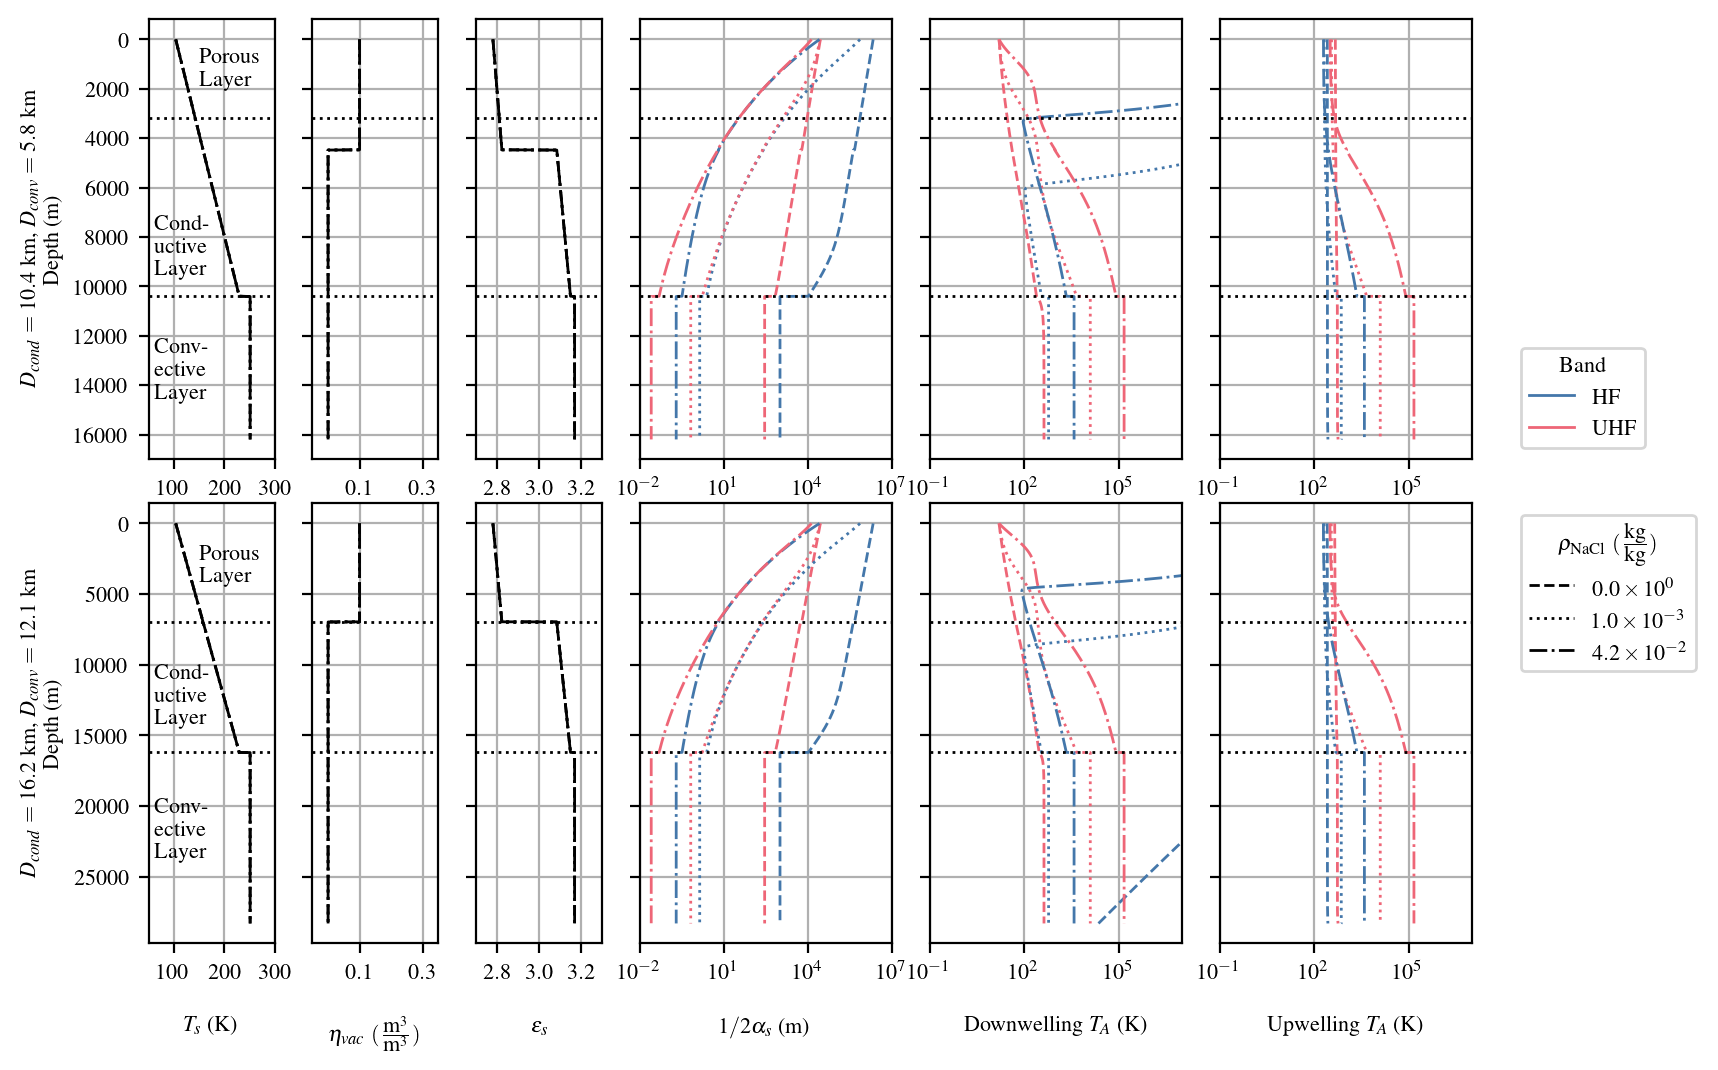

In [41]:
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

number_of_plots = 14
low_band_f = 5.373e6
high_band_f = 413e6

fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 7, width_ratios=[1, 1, 1, 2, 2, 2, 1.5], wspace=0.2, hspace=0.1)

# Define the positions in GridSpec
positions = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6),
    (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)
]

axs = []
for pos in positions:
    temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
    axs.append(temp_ax)

axs = np.array(axs)
ax = np.reshape(axs, (2, 7))

# Plot attenutaion, and T_A
rho_salt_list_of_dfs = [sj_rho_salt0_df, sj_rho_salt1eN3_df, sj_rho_salt4p2eN2_df]
rho_salt_list_of_max_dfs = [sj_maxD_rho_salt0_df, sj_maxD_rho_salt1eN3_df, sj_maxD_rho_salt4p2eN2_df]

# Custom legend for colors
color_cycler=['C0', 'C1', 'black', 'C3', 'C4', 'C5']
color_legend = [Line2D([0], [0], color=c, lw=1) for c in color_cycler]
color_labels = ['HF', 'UHF']

# Custom legend for linestyles
linestyle_cycler=['--', ':', '-.']
linestyle_legend = [Line2D([0], [0], color='black', lw=1, linestyle=ls) for ls in linestyle_cycler]
linestyle_labels = [r'$0.0\times10^{0}$',  
                    r'$1.0\times10^{-3}$', 
                    r'$4.2\times10^{-2}$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    max_df = rho_salt_list_of_max_dfs[i]

    # Temperature
    ax[0, 0].plot(df['Temperature (K)'], df['Depth (m)'], c='black', linestyle=linestyle_cycler[i])
    ax[0, 0].set_ylabel(r'$D_{cond}=10.4\textrm{ km}$, $D_{conv}=5.8\textrm{ km}$' '\n' 'Depth (m)')
    ax[0, 0].set_xlim(50, 300)
    ax[0, 0].set_xticks([100, 200, 300])
    
    ax[1, 0].plot(max_df['Temperature (K)'], max_df['Depth (m)'], c='black', linestyle=linestyle_cycler[i])
    ax[1, 0].set_xlabel('$T_s$ (K)', labelpad=12)
    ax[1, 0].set_ylabel(r'$D_{cond}=16.2\textrm{ km}$, $D_{conv}=12.1\textrm{ km}$' '\n' 'Depth (m)')
    ax[1, 0].set_xlim(50, 300)
    ax[1, 0].set_xticks([100, 200, 300])

    # Porosity
    ax[0, 1].plot(df['Porosity (m^3/m^3)'], df['Depth (m)'], c='black', linestyle=linestyle_cycler[i])
    ax[0, 1].set_xlim(-0.05, 0.35)
    ax[0, 1].set_xticks([0.1, 0.3])
    
    ax[1, 1].plot(max_df['Porosity (m^3/m^3)'], max_df['Depth (m)'], c='black', linestyle=linestyle_cycler[i])
    ax[1, 1].set_xlim(-0.05, 0.35)
    ax[1, 1].set_xticks([0.1, 0.3])
    ax[1, 1].set_xlabel(r'$\eta_{vac}$ $(\frac{\textrm{m}^3}{\textrm{m}^3})$', labelpad=12)

    # Permittivity
    ax[0, 2].plot(df['epsilon_s_prime'], df['Depth (m)'], c='black', linestyle=linestyle_cycler[i])
    ax[0, 2].set_xlim([2.7, 3.3])
    ax[0, 2].set_xticks([2.8, 3.0, 3.2])
    ax[1, 2].plot(max_df['epsilon_s_prime'], max_df['Depth (m)'], c='black', linestyle=linestyle_cycler[i])
    ax[1, 2].set_xlabel(r'$\epsilon_s$', labelpad=12)
    ax[1, 2].set_xlim([2.7, 3.3])
    ax[1, 2].set_xticks([2.8, 3.0, 3.2])

    # Penetration Depth
    ax[0, 3].plot(0.5 / df['alpha_s low band'], df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 3].plot(0.5 / df['alpha_s high band'], df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 3].set_xscale('log')
    ax[0, 3].set_xlim(10**-2, 10**7)

    ax[1, 3].plot(0.5 / max_df['alpha_s low band'], max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 3].plot(0.5 / max_df['alpha_s high band'], max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 3].set_xscale('log')
    ax[1, 3].set_xlabel(r'$1/2\alpha_s$ (m)', labelpad=12)
    ax[1, 3].set_xlim(10**-2, 10**7)

    # Downwelling T A 
    ax[0, 4].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 4].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 4].set_xscale('log')
    ax[0, 4].set_xlim(10**-1, 10**7)

    ax[1, 4].plot(max_df['T_A Downwelling Low Band (K)'], max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 4].plot(max_df['T_A Downwelling High Band (K)'], max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 4].set_xlabel('Downwelling $T_A$ (K)', labelpad=12)
    ax[1, 4].set_xscale('log')
    ax[1, 4].set_xlim(10**-1, 10**7)


    # Upwelling T A 
    ax[0, 5].plot(df['T_A Upwelling Low Band (K)'], df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[0, 5].plot(df['T_A Upwelling High Band (K)'], df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[0, 5].set_xscale('log')
    ax[0, 5].set_xlim(10**-1, 10**7)

    ax[1, 5].plot(max_df['T_A Upwelling Low Band (K)'], max_df['Depth (m)'], c=color_cycler[0], linestyle=linestyle_cycler[i])
    ax[1, 5].plot(max_df['T_A Upwelling High Band (K)'], max_df['Depth (m)'], c=color_cycler[1], linestyle=linestyle_cycler[i])
    ax[1, 5].set_xlabel('Upwelling $T_A$ (K)', labelpad=12)
    ax[1, 5].set_xscale('log')
    ax[1, 5].set_xlim(10**-1, 10**7)

# Create a combined legend with color and linestyle legends
axs[6].legend(color_legend, color_labels, title='Band', loc='lower left')
axs[13].legend(linestyle_legend, linestyle_labels, title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', loc='upper left')

# axs[7].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != 7:
        axs[i].set_yticklabels([])
    if i==6 or i==13:
        axs[i].axis('off')
    else:
        if i < 7:
            brittle_depth = 3.2e3
            cond_depth = 10.4e3
            # Add horizontal dotted line at specific depth
            axs[i].axhline(brittle_depth, color='black', linestyle=':', linewidth=1)
            axs[i].axhline(cond_depth, color='black', linestyle=':', linewidth=1)
            # Add label for the horizontal line
            if i == 0:
                axs[i].text(axs[i].get_xlim()[1] - 150, brittle_depth - 2e3, 'Porous\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth - 2e3, 'Cond-\nuctive\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth + 3e3, 'Conv-\nective\nLayer', va='center', ha='left', color='black')
        else:
            brittle_depth =  0.43*16.2e3
            cond_depth = 16.2e3
            # Add horizontal dotted line at specific depth
            axs[i].axhline(brittle_depth, color='black', linestyle=':', linewidth=1)
            axs[i].axhline(cond_depth, color='black', linestyle=':', linewidth=1)
            # Add label for the horizontal line
            if i==7:
                axs[i].text(axs[i].get_xlim()[1] - 150, brittle_depth - 4e3, 'Porous\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth - 4e3, 'Cond-\nuctive\nLayer', va='center', ha='left', color='black')
                axs[i].text(axs[i].get_xlim()[0] + 10, cond_depth + 5.5e3,'Conv-\nective\nLayer', va='center', ha='left', color='black')



In [42]:
0.5 / max_df['alpha_s high band']

0       13395.171141
1       13254.742142
2       13115.184951
3       12976.381166
4       12838.441761
            ...     
2826        0.025208
2827        0.025208
2828        0.025208
2829        0.025208
2830        0.025208
Name: alpha_s high band, Length: 2831, dtype: float64

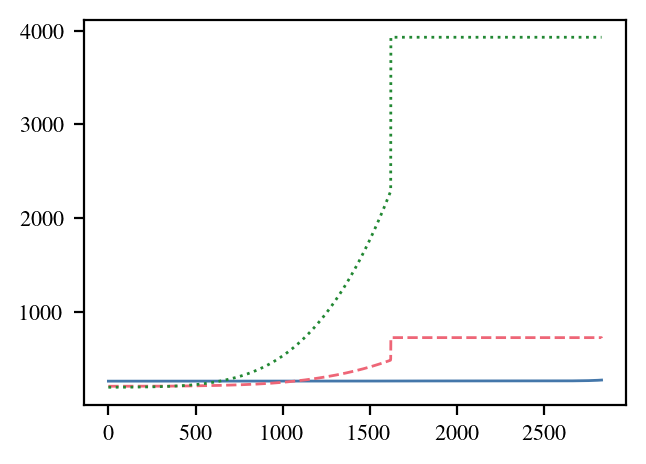

In [43]:
plt.figure()
for df in rho_salt_list_of_max_dfs:
    plt.plot(df['T_A Upwelling Low Band (K)'])

NameError: name 'rho_salt0_df' is not defined

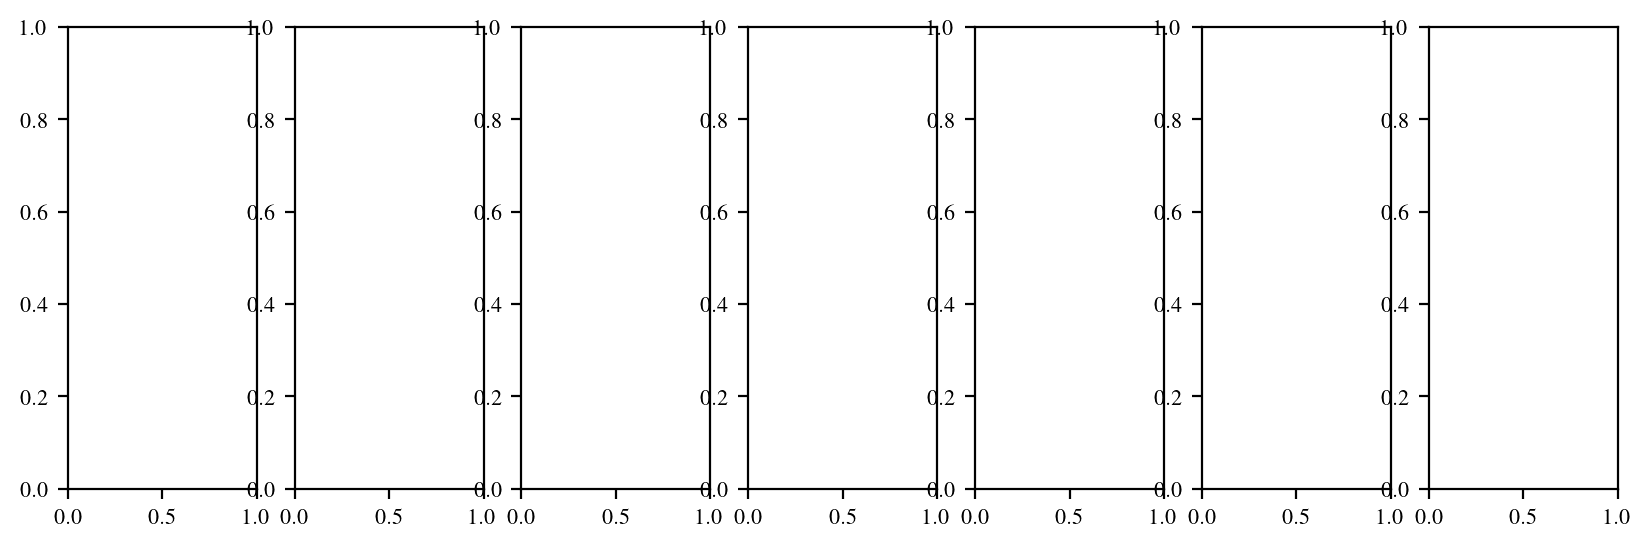

In [44]:
number_of_plots = 7
low_band_f = 5.373e6
high_band_f = 413e6

fig, axs = plt.subplots(1, number_of_plots, figsize=(10, 3)) #, gridspec_kw={'wspace': 0}

# Plot ice temperature,  
# penetration depth (include a penetration depth of sea water, and terrestrial sea ice), 
# wavelength, T_A, puck placements
rho_salt_list_of_dfs = [rho_salt0_df, rho_salt1eN5_df, rho_salt1eN3_df, rho_salt4p2eN2_df]
rho_salt_legend_names = [r'$\rho_{\rm{NaCl}}=0$', r'$\rho_{\rm{NaCl}}=1\times10^{-5}$', r'$\rho_{\rm{NaCl}}=1\times10^{-3}$', r'$\rho_{\rm{NaCl}}=4.2\times10^{-2}$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    label = rho_salt_legend_names[i]
    axs[0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    axs[1].plot(c / (low_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    axs[2].plot(c / (high_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    axs[3].plot(1 / df['alpha_s low band'], df['Depth (m)'], label=label)
    axs[4].plot(1 / df['alpha_s high band'], df['Depth (m)'], label=label)
    axs[5].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], label=label)
    axs[6].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], label=label)

axs[0].set_xlabel('$T_s$ (K)', labelpad=12)
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()

# wavelength
axs[1].set_xlabel(r'$\lambda_s$ (m)' "\n" r'$\rm{HF}$', labelpad=12)

# wavelength
axs[2].set_xlabel(r'$\lambda_s$ (m)' "\n" r'$\rm{UHF}$', labelpad=12)

# penetration depth (include a penetration depth of sea water, and terrestrial sea ice)
axs[3].set_xlabel(r'$1/\alpha_s$ (m)' "\n" r'$\rm{HF}$', labelpad=12)
axs[3].set_xscale('log')

axs[4].set_xlabel(r'$1/\alpha_s$ (m)' "\n" r'$\rm{UHF}$', labelpad=12)
axs[4].set_xscale('log')

# T_A
axs[5].set_xlabel('$T_A$ (K)' "\n" r'$\rm{HF}$', labelpad=12)
axs[5].set_xscale('log')

axs[6].set_xlabel('$T_A$ (K)' "\n" r'$\rm{UHF}$', labelpad=12)
axs[6].set_xscale('log')
axs[6].legend()


for i in np.arange(number_of_plots):
    axs[i].grid(True)
    if i != 0:
        axs[i].invert_yaxis()
        axs[i].set_yticklabels([])


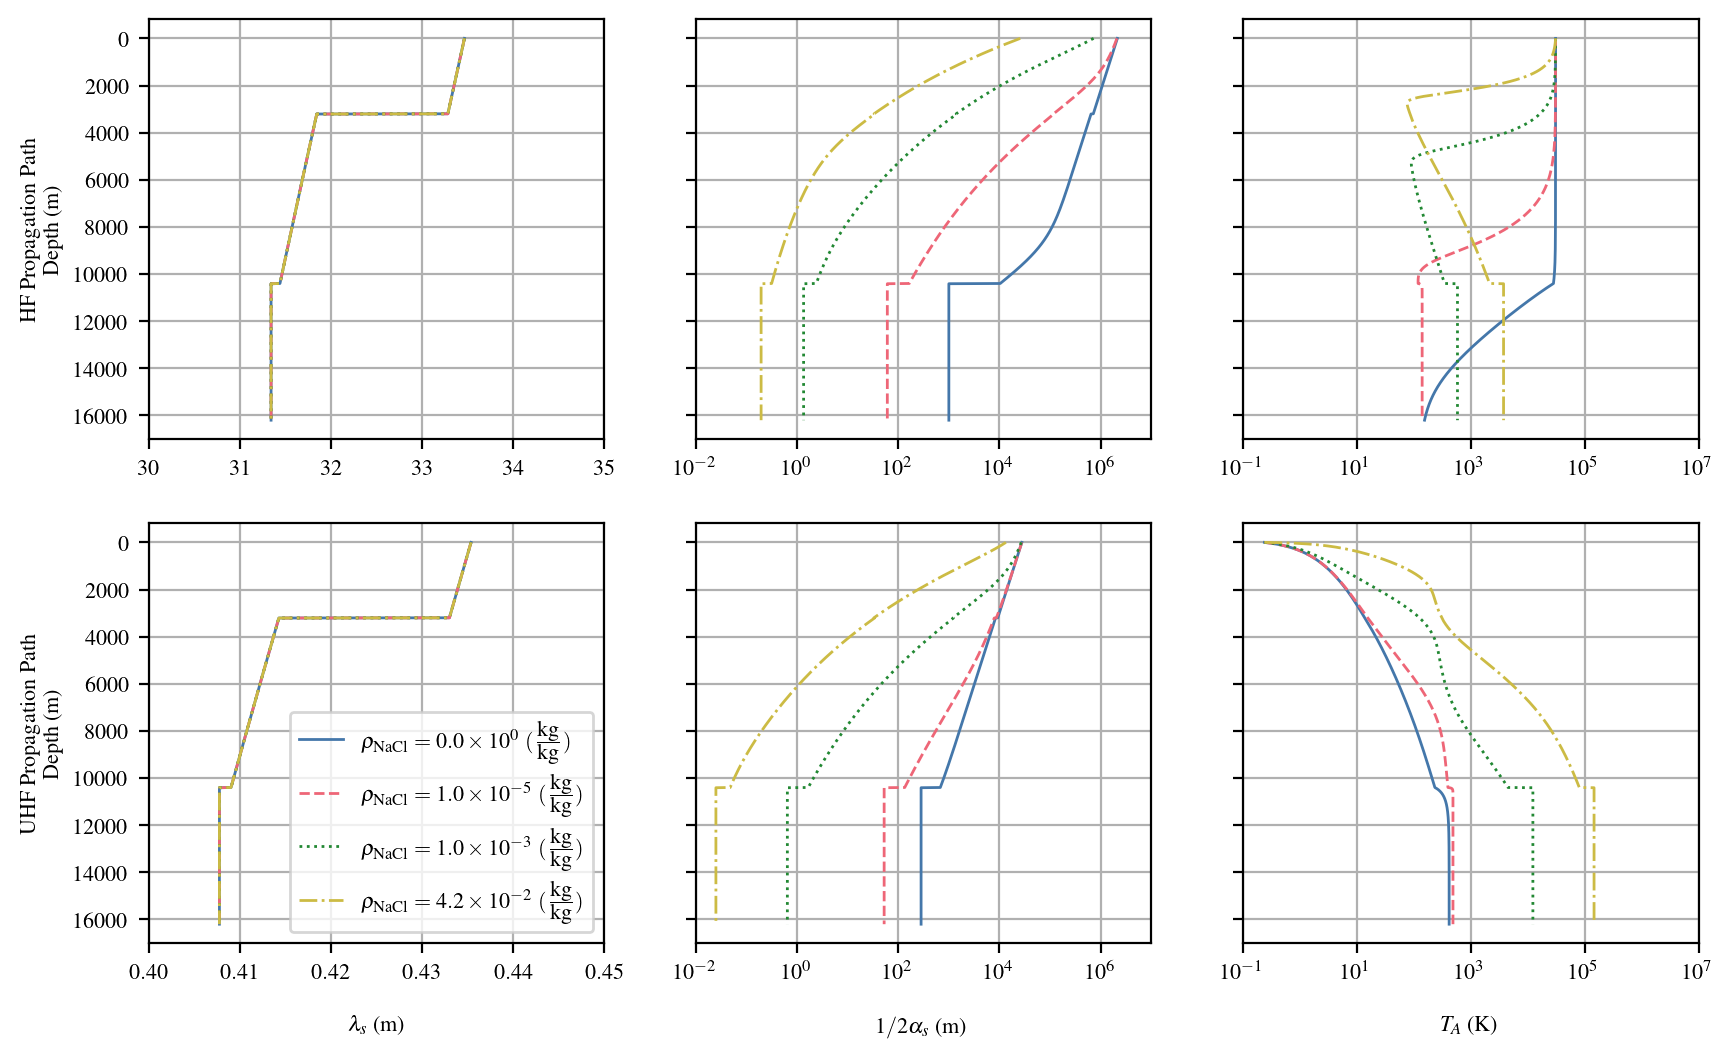

In [ ]:
from matplotlib.gridspec import GridSpec

number_of_plots = 6
low_band_f = 5.373e6
high_band_f = 413e6

fig, ax = plt.subplots(2, 3, figsize=(10, 6)) #, gridspec_kw={'wspace': 0}
gs = GridSpec(1, 2, width_ratios=[1, 2], wspace=0)  # First plot is half the width of the second

axs = ax.flatten()

# Plot ice temperature,  
# penetration depth (include a penetration depth of sea water, and terrestrial sea ice), 
# wavelength, T_A, puck placements
rho_salt_list_of_dfs = [rho_salt0_df, rho_salt1eN5_df, rho_salt1eN3_df, rho_salt4p2eN2_df]
rho_salt_legend_names = [r'$\rho_{\rm{NaCl}}=0.0\times10^{0}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', 
                         r'$\rho_{\rm{NaCl}}=1.0\times10^{-5}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', 
                         r'$\rho_{\rm{NaCl}}=1.0\times10^{-3}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', 
                         r'$\rho_{\rm{NaCl}}=4.2\times10^{-2}$ $(\frac{\textrm{kg}}{\textrm{kg}})$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    label = rho_salt_legend_names[i]

        # Wavelength
    ax[0, 0].plot(c / (low_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[0, 0].set_xlim(30, 35)
    ax[0, 0].set_ylabel('HF Propagation Path' '\n' 'Depth (m)')

    ax[1, 0].set_ylabel('UHF Propagation Path' '\n' 'Depth (m)')
    ax[1, 0].plot(c / (high_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[1, 0].set_xlabel(r'$\lambda_s$ (m)', labelpad=12)
    ax[1, 0].set_xlim(0.4, 0.45)

    # Penetration Depth
    ax[0, 1].plot(0.5 / df['alpha_s low band'], df['Depth (m)'], label=label)
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xlim(10**-2, 10**7)

    ax[1, 1].plot(0.5 / df['alpha_s high band'], df['Depth (m)'], label=label)
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xlabel(r'$1/2\alpha_s$ (m)', labelpad=12)
    ax[1, 1].set_xlim(10**-2, 10**7)

    # T A 
    ax[0, 2].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], label=label)
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xlim(10**-1, 10**7)

    ax[1, 2].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], label=label)
    ax[1, 2].set_xlabel('$T_A$ (K)', labelpad=12)
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xlim(10**-1, 10**7)

axs[3].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != 3:
        
        axs[i].set_yticklabels([])

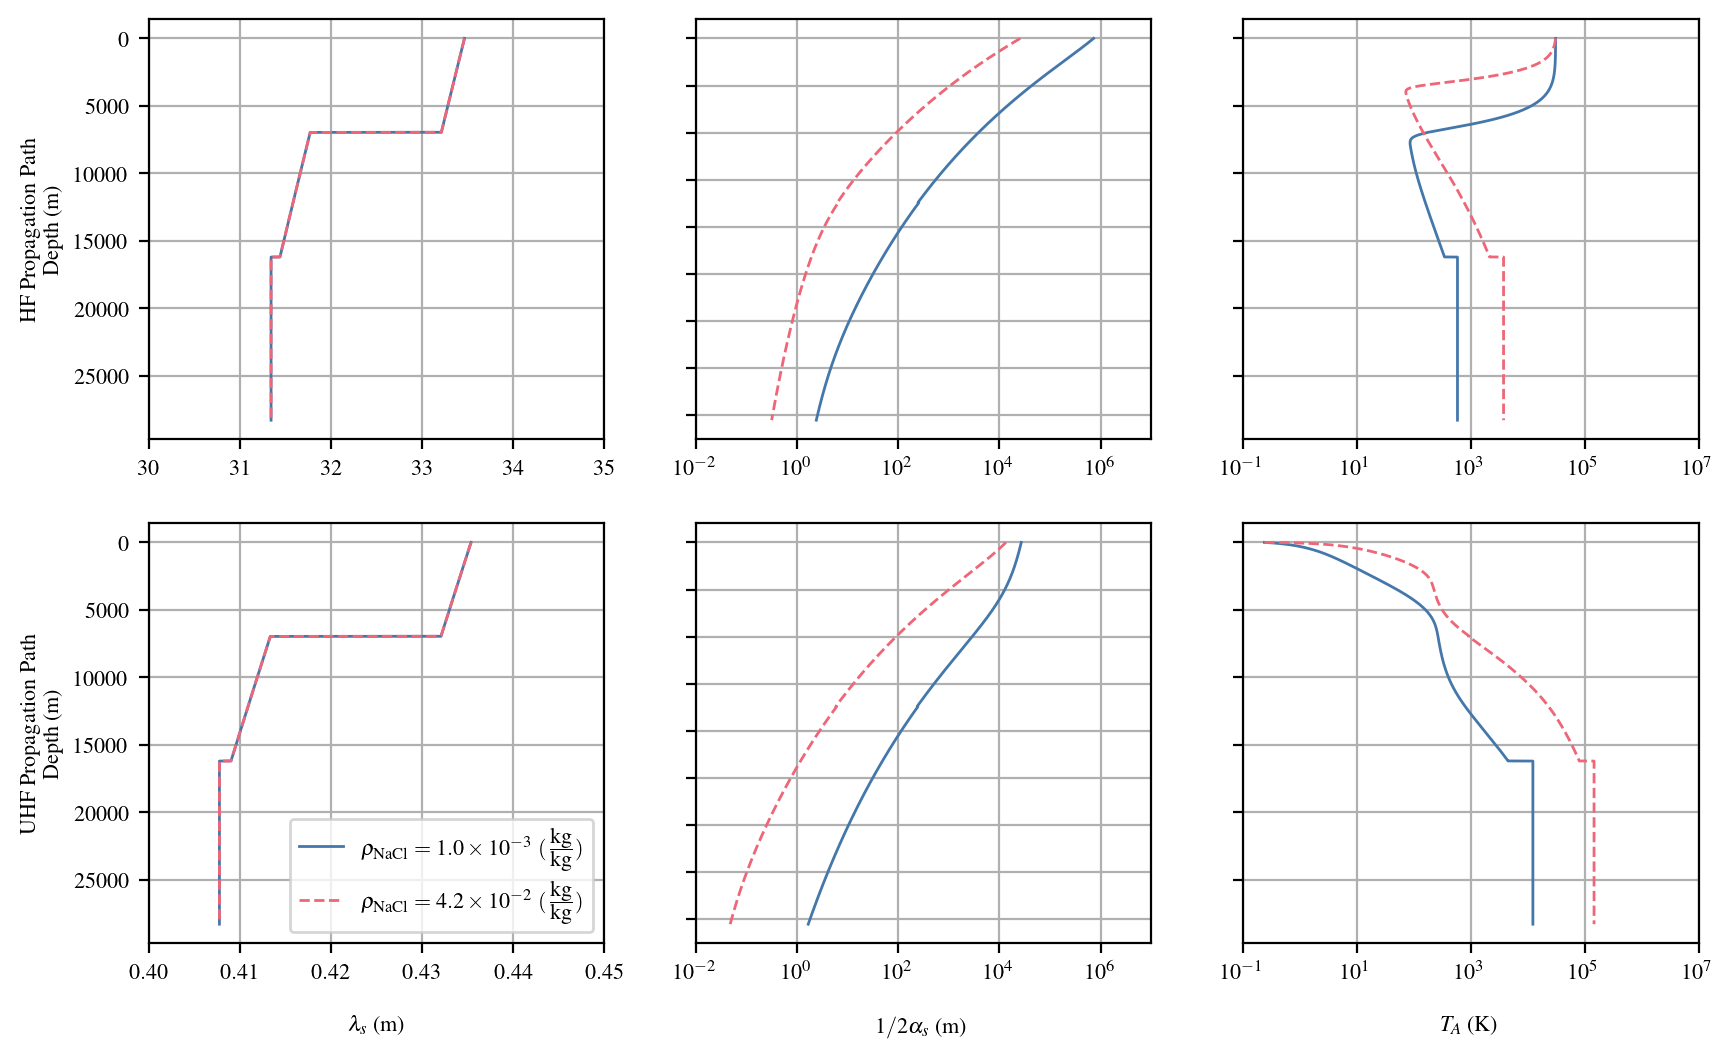

In [ ]:
from matplotlib.gridspec import GridSpec

number_of_plots = 6
low_band_f = 5.373e6
high_band_f = 413e6

fig, ax = plt.subplots(2, 3, figsize=(10, 6)) #, gridspec_kw={'wspace': 0}
gs = GridSpec(1, 2, width_ratios=[1, 2], wspace=0)  # First plot is half the width of the second

axs = ax.flatten()

# Plot ice temperature,  
# penetration depth (include a penetration depth of sea water, and terrestrial sea ice), 
# wavelength, T_A, puck placements
rho_salt_list_of_dfs = [maxD_rho_salt1eN3_df, maxD_rho_salt4p2eN2_df]
rho_salt_legend_names = [r'$\rho_{\rm{NaCl}}=1.0\times10^{-3}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', 
                         r'$\rho_{\rm{NaCl}}=4.2\times10^{-2}$ $(\frac{\textrm{kg}}{\textrm{kg}})$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    label = rho_salt_legend_names[i]

        # Wavelength
    ax[0, 0].plot(c / (low_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[0, 0].set_xlim(30, 35)
    ax[0, 0].set_ylabel('HF Propagation Path' '\n' 'Depth (m)')

    ax[1, 0].set_ylabel('UHF Propagation Path' '\n' 'Depth (m)')
    ax[1, 0].plot(c / (high_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[1, 0].set_xlabel(r'$\lambda_s$ (m)', labelpad=12)
    ax[1, 0].set_xlim(0.4, 0.45)

    # Penetration Depth
    ax[0, 1].plot(0.5 / df['alpha_s low band'], df['Depth (m)'], label=label)
    ax[0, 1].set_xscale('log')
    ax[0, 1].set_xlim(10**-2, 10**7)

    ax[1, 1].plot(0.5 / df['alpha_s high band'], df['Depth (m)'], label=label)
    ax[1, 1].set_xscale('log')
    ax[1, 1].set_xlabel(r'$1/2\alpha_s$ (m)', labelpad=12)
    ax[1, 1].set_xlim(10**-2, 10**7)

    # T A 
    ax[0, 2].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], label=label)
    ax[0, 2].set_xscale('log')
    ax[0, 2].set_xlim(10**-1, 10**7)

    ax[1, 2].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], label=label)
    ax[1, 2].set_xlabel('$T_A$ (K)', labelpad=12)
    ax[1, 2].set_xscale('log')
    ax[1, 2].set_xlim(10**-1, 10**7)

axs[3].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != 3:
        
        axs[i].set_yticklabels([])

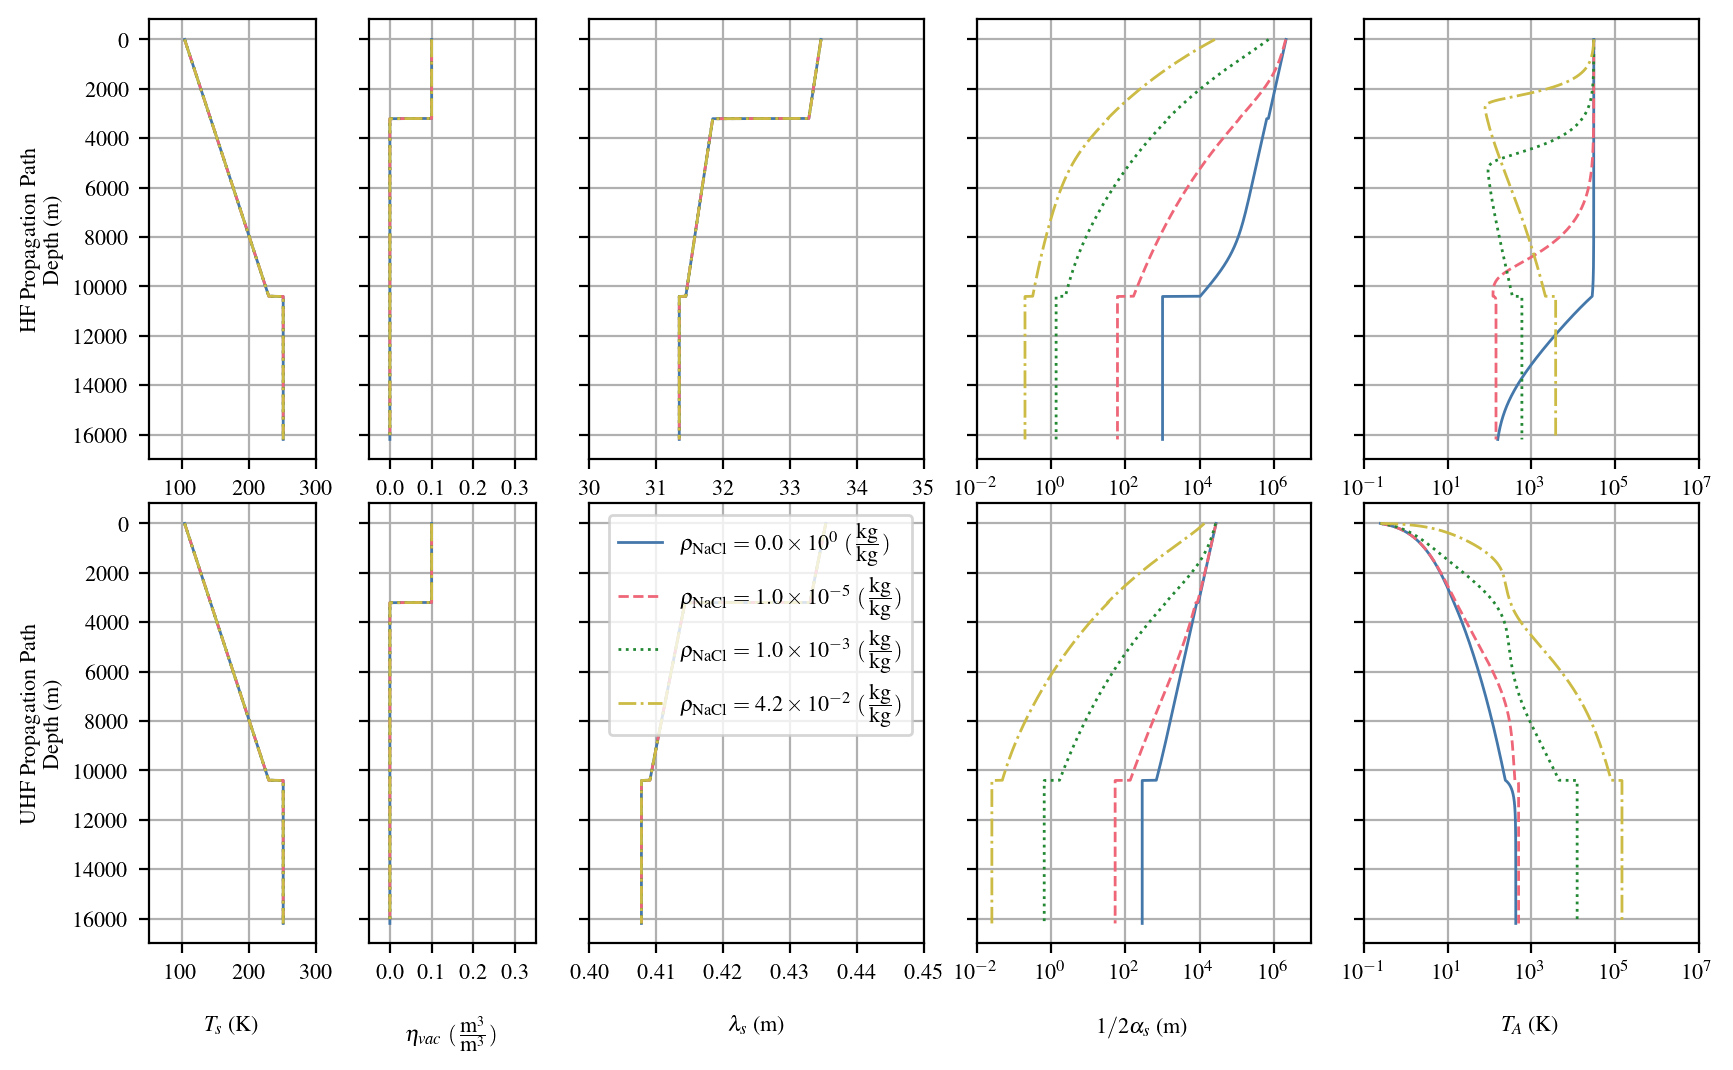

In [ ]:
from matplotlib.gridspec import GridSpec

number_of_plots = 10
low_band_f = 5.373e6
high_band_f = 413e6

fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 5, width_ratios=[1, 1, 2, 2, 2], wspace=0.2, hspace=0.1)

# Define the positions in GridSpec
positions = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4),
    (1, 0), (1, 1), (1, 2), (1, 3), (1, 4)
]

axs = []
for pos in positions:
    temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
    axs.append(temp_ax)

axs = np.array(axs)
ax = np.reshape(axs, (2, 5))

# Plot ice temperature,  
# penetration depth (include a penetration depth of sea water, and terrestrial sea ice), 
# wavelength, T_A, puck placements
rho_salt_list_of_dfs = [rho_salt0_df, rho_salt1eN5_df, rho_salt1eN3_df, rho_salt4p2eN2_df]
rho_salt_legend_names = [r'$\rho_{\rm{NaCl}}=0.0\times10^{0}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', 
                         r'$\rho_{\rm{NaCl}}=1.0\times10^{-5}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', 
                         r'$\rho_{\rm{NaCl}}=1.0\times10^{-3}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', 
                         r'$\rho_{\rm{NaCl}}=4.2\times10^{-2}$ $(\frac{\textrm{kg}}{\textrm{kg}})$']

for i in range(len(rho_salt_list_of_dfs)):
    df = rho_salt_list_of_dfs[i]
    label = rho_salt_legend_names[i]
    # Temperature
    ax[0, 0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    ax[0, 0].set_ylabel('HF Propagation Path' '\n' 'Depth (m)')
    ax[0, 0].set_xlim(50, 300)
    ax[0, 0].set_xticks([100, 200, 300])
    
    ax[1, 0].plot(df['Temperature (K)'], df['Depth (m)'], label=label)
    ax[1, 0].set_xlabel('$T_s$ (K)', labelpad=12)
    ax[1, 0].set_ylabel('UHF Propagation Path' '\n' 'Depth (m)')
    ax[1, 0].set_xlim(50, 300)
    ax[1, 0].set_xticks([100, 200, 300])

    # Porosity
    ax[0, 1].plot(df['Porosity (m^3/m^3)'], df['Depth (m)'], label=label)
    ax[0, 1].set_xlim(-0.05, 0.35)
    ax[0, 1].set_xticks([0.0, 0.1, 0.2, 0.3])
    
    ax[1, 1].plot(df['Porosity (m^3/m^3)'], df['Depth (m)'], label=label)
    ax[1, 1].set_xlim(-0.05, 0.35)
    ax[1, 1].set_xticks([0.0, 0.1, 0.2, 0.3])
    ax[1, 1].set_xlabel(r'$\eta_{vac}$ $(\frac{\textrm{m}^3}{\textrm{m}^3})$', labelpad=12)

    # Wavelength
    ax[0, 2].plot(c / (low_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[0, 2].set_xlim(30, 35)

    ax[1, 2].plot(c / (high_band_f * np.sqrt(df['epsilon_s_prime'])), df['Depth (m)'], label=label)
    ax[1, 2].set_xlabel(r'$\lambda_s$ (m)', labelpad=12)
    ax[1, 2].set_xlim(0.4, 0.45)

    # Penetration Depth
    ax[0, 3].plot(0.5 / df['alpha_s low band'], df['Depth (m)'], label=label)
    ax[0, 3].set_xscale('log')
    ax[0, 3].set_xlim(10**-2, 10**7)

    ax[1, 3].plot(0.5 / df['alpha_s high band'], df['Depth (m)'], label=label)
    ax[1, 3].set_xscale('log')
    ax[1, 3].set_xlabel(r'$1/2\alpha_s$ (m)', labelpad=12)
    ax[1, 3].set_xlim(10**-2, 10**7)

    # T A 
    ax[0, 4].plot(df['T_A Downwelling Low Band (K)'], df['Depth (m)'], label=label)
    ax[0, 4].set_xscale('log')
    ax[0, 4].set_xlim(10**-1, 10**7)

    ax[1, 4].plot(df['T_A Downwelling High Band (K)'], df['Depth (m)'], label=label)
    ax[1, 4].set_xlabel('$T_A$ (K)', labelpad=12)
    ax[1, 4].set_xscale('log')
    ax[1, 4].set_xlim(10**-1, 10**7)

axs[7].legend()

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].invert_yaxis()
    if i != 0 and i != 5:
        axs[i].set_yticklabels([])